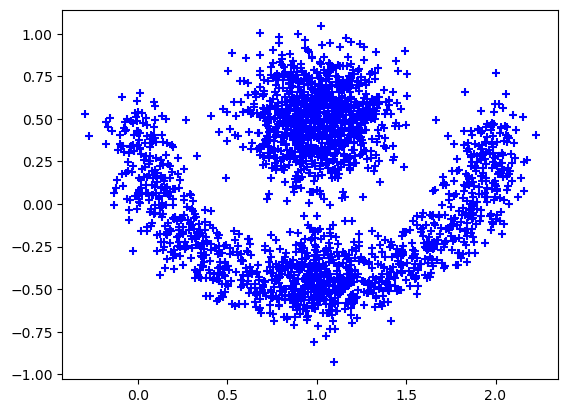

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the Excel file
combined = pd.read_excel('combined_data.xlsx')

# Plot the scatter plot
plt.scatter(combined[0], combined[1], c='blue', s=40, marker='+')
plt.show()

In [7]:
combined = combined.values
combined

array([[ 0.17656439, -0.14799358],
       [ 0.0129321 ,  0.00735624],
       [ 2.03468739, -0.17751591],
       ...,
       [ 1.30725015, -0.1593264 ],
       [ 0.88296554, -0.24191647],
       [ 0.9082745 , -0.54506992]])

In [3]:
import numpy as np

def euclidean_distance(point1, point2):
    # 使用numpy计算欧氏距离
    return np.sqrt(np.sum((point1 - point2) ** 2, axis=1))

def mean_shift(pixel_list, bandwidth):
    centroids = np.copy(pixel_list)
    # for _ in range(100):  # 迭代次数，可以根据需要调整
    for i, centroid in enumerate(centroids):
        # 计算每个点到质心的欧氏距离
        distances = euclidean_distance(pixel_list, centroid)
        # 计算权重
        weights = np.exp(-0.5 * (distances / bandwidth) ** 2)
        # 更新质心
        numerator = np.sum(pixel_list * weights[:, np.newaxis], axis=0)
        denominator = np.sum(weights)
        centroids[i] = numerator / denominator
    return np.round(centroids, 3)

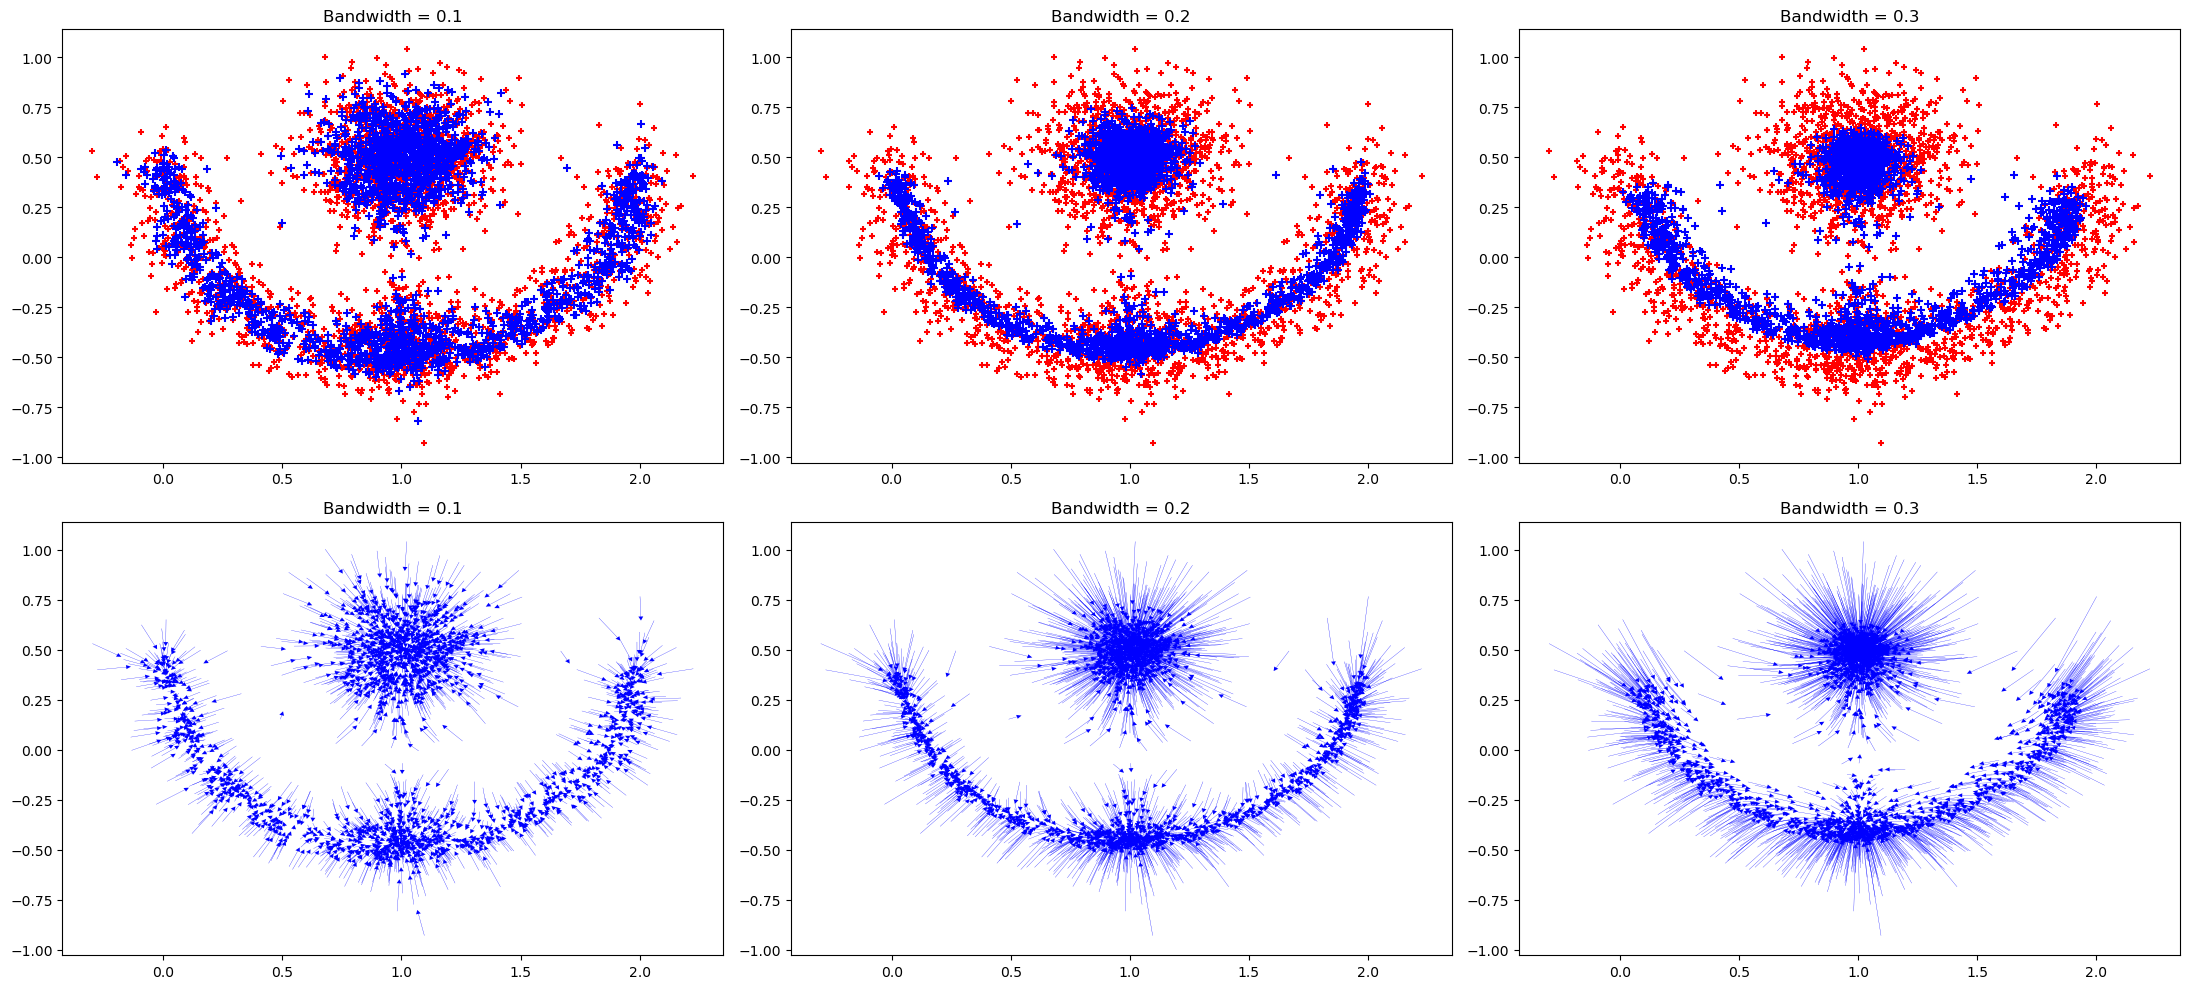

In [8]:
# 创建一个包含两行三列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(22, 10))

# 带宽值列表
bandwidths = [0.1, 0.2, 0.3]

# 遍历每个带宽值
for i, bandwidth in enumerate(bandwidths):
    # 计算新的质心
    new_centroids = mean_shift(combined, bandwidth)
    
    # 绘制散点图
    axs[0, i].scatter(combined[:, 0], combined[:, 1], c='red', s=20, marker='+')
    axs[0, i].scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', s=40, marker='+')
    axs[0, i].set_title(f'Bandwidth = {bandwidth}')
    
    # 绘制箭头
    for j in range(len(new_centroids)):
        dx = new_centroids[j, 0] - combined[j, 0]
        dy = new_centroids[j, 1] - combined[j, 1]
        axs[1, i].arrow(combined[j, 0], combined[j, 1], dx, dy, head_width=0.02, head_length=0.02, linewidth=0.02, fc='blue', ec='blue')
    axs[1, i].set_title(f'Bandwidth = {bandwidth}')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np


sample_size = int(len(combined) * 0.5)

# 随机选择索引进行下采样
indices = np.random.choice(len(combined), size=sample_size, replace=False)
downsampled_combined = combined[indices]

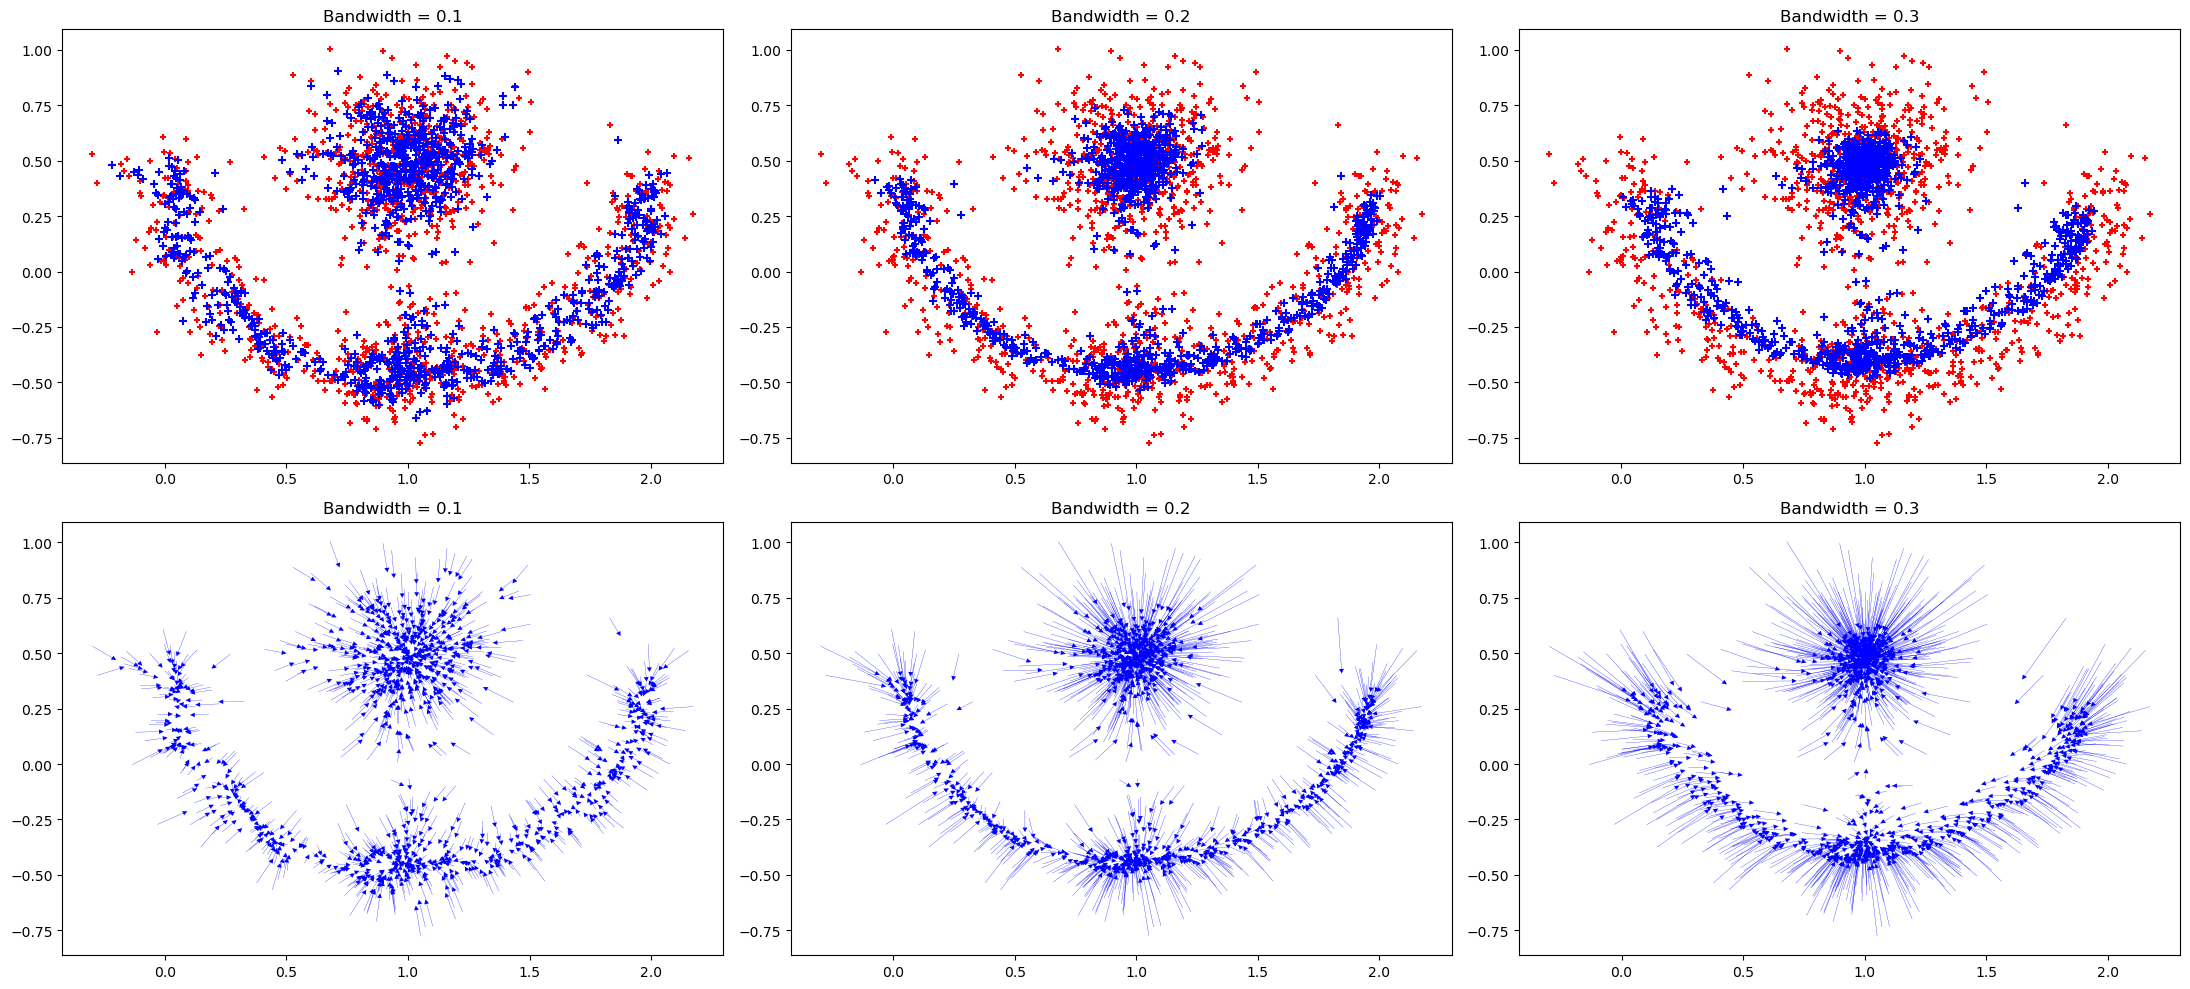

In [10]:
# 创建一个包含两行三列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(22, 10))

# 带宽值列表
bandwidths = [0.1, 0.2, 0.3]

# 遍历每个带宽值
for i, bandwidth in enumerate(bandwidths):
    # 计算新的质心
    new_centroids = mean_shift(downsampled_combined, bandwidth)
    
    # 绘制散点图
    axs[0, i].scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='red', s=20, marker='+')
    axs[0, i].scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', s=40, marker='+')
    axs[0, i].set_title(f'Bandwidth = {bandwidth}')
    
    # 绘制箭头
    for j in range(len(new_centroids)):
        dx = new_centroids[j, 0] - downsampled_combined[j, 0]
        dy = new_centroids[j, 1] - downsampled_combined[j, 1]
        axs[1, i].arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], dx, dy, head_width=0.02, head_length=0.02, linewidth=0.02, fc='blue', ec='blue')
    axs[1, i].set_title(f'Bandwidth = {bandwidth}')

plt.tight_layout()
plt.show()

In [11]:
import numpy as np


sample_size = int(len(combined) * 0.1)

# 随机选择索引进行下采样
indices = np.random.choice(len(combined), size=sample_size, replace=False)
downsampled_combined = combined[indices]

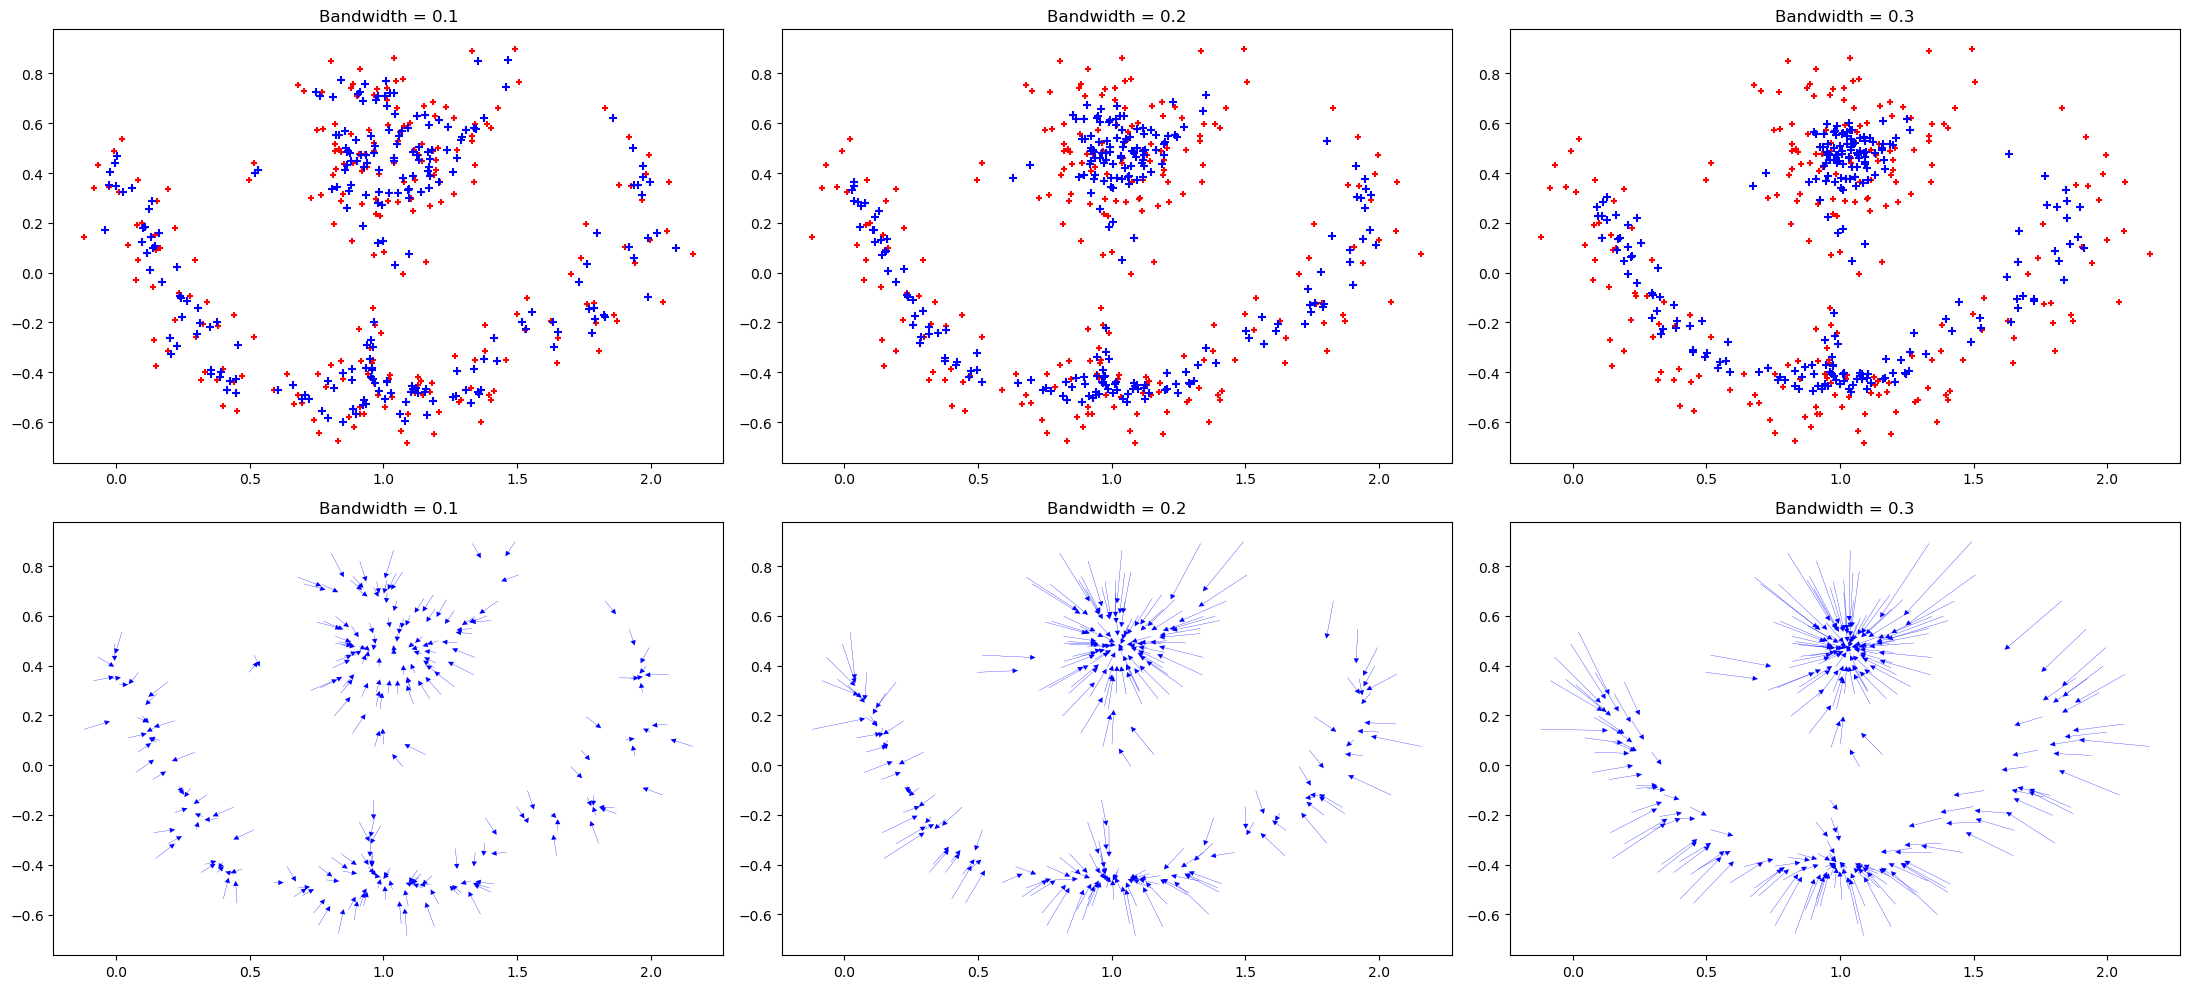

In [12]:
# 创建一个包含两行三列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(22, 10))

# 带宽值列表
bandwidths = [0.1, 0.2, 0.3]

# 遍历每个带宽值
for i, bandwidth in enumerate(bandwidths):
    # 计算新的质心
    new_centroids = mean_shift(downsampled_combined, bandwidth)
    
    # 绘制散点图
    axs[0, i].scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='red', s=20, marker='+')
    axs[0, i].scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', s=40, marker='+')
    axs[0, i].set_title(f'Bandwidth = {bandwidth}')
    
    # 绘制箭头
    for j in range(len(new_centroids)):
        dx = new_centroids[j, 0] - downsampled_combined[j, 0]
        dy = new_centroids[j, 1] - downsampled_combined[j, 1]
        axs[1, i].arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], dx, dy, head_width=0.02, head_length=0.02, linewidth=0.02, fc='blue', ec='blue')
    axs[1, i].set_title(f'Bandwidth = {bandwidth}')

plt.tight_layout()
plt.show()